# Customer Data Analysis and Visualisations - Part 2 (analysis_active_customers.csv file)

### This script (Part 2) contains the following points:

#### 01. Import Libraries and Files

#### 02. Examining the df_cust *(analysis_active_customers.csv file)* dataframe

#### 03. Data Wrangling and Consistency Checks on analysis_active_customers
* Check NaN values and change data types<br>
Change data types

##### Import departments wrangled and convert to data dictionary then map to dataframe
Checking department mapping entries

#### 04. Data Analysis and Visualisations (continued)

##### Customer Profiling
* Creating 'generation_flag'<br>
* Creating 'earnings_flag'<br>
* Creating 'diet_flag'<br>
Create new grouping based on unique user_id and all the department_id's<br>
Creating diet dictionary<br>
Applying diet dictionary to create 'diet_flag' in dataframe and checking entries<br>
* Creating 'pet_baby_flag' <br>
Create new grouping based on unique user_id, no_dependents and all the department_id's<br>
Creating pet_baby dictionary<br>
Applying pet_baby dictionary to create 'pet_baby_flag' in dataframe and checking entries<br>

##### Create individual customer profiles
* Parent with baby profile<br>
* Parent with baby and pet profile<br>
* Parent older children no pet profile<br>
* Parent older children pet<br>
* Pet parent<br>
* No children/pets<br>

##### Profile Distribution

#### 05. Exporting the full dataframe 'df_analysis_active' to analysis_active_customer_profiles.csv file

*Looking across the whole dataset (Customer profiling for individual customer user_id's is done in Part 3)*

***

## 01. Import Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign the main project folder path to the variable path and view
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/06_2022_Instacart_Basket_Analysis/'
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/06_2022_Instacart_Basket_Analysis/'

In [3]:
# Use the os.path.join() function to import the analysis_active_customers.csv file as a pandas dataframe
df_analysis_active = pd.read_csv(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'analysis_active_customers.csv'))

***

## 02. Examining the df_analysis (analysis_active_customers.csv file) dataframe

In [4]:
# View the first sixty rows of the dataframe df_analysis_active
df_analysis_active.head(60)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,frequency_flag,gender,US_state,age,date_joined,no_dependents,family_status,income,region,exclusion_flag
0,0,2539329,1,1,2,8,NaN,True,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
1,1,2398795,1,2,3,7,15.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
2,2,473747,1,3,3,12,21.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
3,3,2254736,1,4,4,7,29.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
4,4,431534,1,5,4,15,28.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
5,5,3367565,1,6,2,7,19.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
6,6,550135,1,7,1,9,20.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
7,7,3108588,1,8,1,14,14.0,False,196,2,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
8,8,2295261,1,9,1,16,0.0,False,196,4,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
9,9,2550362,1,10,4,8,30.0,False,196,1,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer


In [5]:
# View the shape of the dataframe df_analysis_active
df_analysis_active.shape

(30964564, 34)

In [6]:
# View the data types
df_analysis_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   order_id                          int64  
 2   user_id                           int64  
 3   order_number                      int64  
 4   orders_day_of_week                int64  
 5   order_hour_of_day                 int64  
 6   days_since_prior_order            float64
 7   first_order                       bool   
 8   product_id                        int64  
 9   add_to_cart_order                 int64  
 10  reordered                         bool   
 11  product_name                      object 
 12  aisle_id                          int64  
 13  department_id                     int64  
 14  prices                            float64
 15  price_range_loc                   object 
 16  busiest_day                       

***

## 03. Data Wrangling and Consistency Checks on analysis_active_customers

In [7]:
# Drop the Unnamed: 0 column which are not required for this analysis 
df_analysis_active.drop(columns = ['Unnamed: 0'], inplace = True)
df_analysis_active

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,US_state,age,date_joined,no_dependents,family_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,False,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
1,2398795,1,2,3,7,15.0,False,196,1,True,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
2,473747,1,3,3,12,21.0,False,196,1,True,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
3,2254736,1,4,4,7,29.0,False,196,1,True,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
4,431534,1,5,4,15,28.0,False,196,1,True,...,Regular Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,2329472,202557,15,6,12,6.0,False,43553,2,True,...,Frequent customer,Female,Minnesota,48,2017-10-11,2,married,36899,Midwest,Active customer
30964560,694731,202557,16,1,14,2.0,False,43553,2,True,...,Frequent customer,Female,Minnesota,48,2017-10-11,2,married,36899,Midwest,Active customer
30964561,1320836,202557,17,2,15,1.0,False,43553,2,True,...,Frequent customer,Female,Minnesota,48,2017-10-11,2,married,36899,Midwest,Active customer
30964562,31526,202557,18,5,11,3.0,False,43553,2,True,...,Frequent customer,Female,Minnesota,48,2017-10-11,2,married,36899,Midwest,Active customer


### Check NaN values and change data types

In [8]:
# Count NaN values in the dataframe
df_analysis_active.isnull().sum()

order_id                                  0
user_id                                   0
order_number                              0
orders_day_of_week                        0
order_hour_of_day                         0
days_since_prior_order              1661283
first_order                               0
product_id                                0
add_to_cart_order                         0
reordered                                 0
product_name                              0
aisle_id                                  0
department_id                             0
prices                                 4877
price_range_loc                           0
busiest_day                               0
Busiest_days                              0
busiest_period_of_the_day                 0
max_order                                 0
loyalty_flag                              0
customer_average_prices                   0
spending_flag                             0
customer_median_prior_order_days

### Change data types

In [9]:
# Change the data types of the 'user_id' to string, and 'gender', 'US_state', 'no_dependents' 'family_status' to category
df_analysis_active = df_analysis_active.astype({'user_id': str, 'gender': 'category', 'US_state': 'category', 'no_dependents': 'int16', 'family_status': 'category'})

In [10]:
# Change the 'date_joined' data type  to datetime
df_analysis_active['date_joined'] = pd.to_datetime(df_analysis_active['date_joined'])

In [11]:
# Change the age and income data types to lower storage capacities 
df_analysis_active['age'] = df_analysis_active['age'].astype('int16')
df_analysis_active['income'] = df_analysis_active['income'].astype('int32')

In [12]:
# Change the data types of the 'order_id', 'product_id', 'aisle_id' and 'department_id' columns to string (these variables are qualitative nominal) and reordered to boolean (this is a yes/no variable))
df_analysis_active = df_analysis_active.astype({'order_id': str, 'product_id': str, 'aisle_id': str, 'department_id': str})

In [13]:
# Change the data types of the 'loyalty_flag', 'spending_flag', and 'frequency_flag' to cartegory (these values are ordinal categories)
df_analysis_active = df_analysis_active.astype({'price_range_loc': 'category', 'busiest_day': 'category', 'Busiest_days': 'category', 'busiest_period_of_the_day': 'category', 'loyalty_flag': 'category',  'spending_flag': 'category', 'frequency_flag': 'category'})

In [14]:
# Change the data types of the 'days_since_prior_order' and 'customer_median_prior_order_days' columns to Int32
df_analysis_active = df_analysis_active.astype({'order_number': 'int16', 'orders_day_of_week': 'int16', 'order_hour_of_day': 'int16', 'add_to_cart_order': 'int16', 'max_order': 'int16'})

In [15]:
# Change the data types of the 'days_since_prior_order' and 'customer_median_prior_order_days' columns to Int16
df_analysis_active = df_analysis_active.astype({'days_since_prior_order': 'Int16', 'customer_median_prior_order_days': 'Int16'})

In [16]:
# Show the data types in the data frame and check the memory usage
df_analysis_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 33 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   order_id                          object        
 1   user_id                           object        
 2   order_number                      int16         
 3   orders_day_of_week                int16         
 4   order_hour_of_day                 int16         
 5   days_since_prior_order            Int16         
 6   first_order                       bool          
 7   product_id                        object        
 8   add_to_cart_order                 int16         
 9   reordered                         bool          
 10  product_name                      object        
 11  aisle_id                          object        
 12  department_id                     object        
 13  prices                            float64       
 14  price_range_loc 

In [17]:
# View the shape of the dataframe df_analysis_active
df_analysis_active.shape

(30964564, 33)

***

### Import departments wrangled and convert to data dictionary then map to dataframe

In [18]:
# Import the deparments_wrangled file as dataframe df_dept
df_dept = pd.read_csv(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'departments_wrangled.csv'))
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [19]:
# Define a blank dictionary with no elements
dept_dict = {}

# Create new dictionary with the information from df_dept
for row in df_dept.itertuples(index=True, name='Pandas'): 
    dept_dict[getattr(row, "department_id")] = getattr(row, "department")
dept_dict    

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [20]:
# Use the data dictionary to map the 'department_id' to the department and create a new column 'department' in the 'df_analysis_active' dataframe
df_analysis_active['department'] = df_analysis_active['department_id'].astype(int).map(dept_dict)
df_analysis_active.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,US_state,age,date_joined,no_dependents,family_status,income,region,exclusion_flag,department
0,2539329,1,1,2,8,<NA>,True,196,1,False,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
1,2398795,1,2,3,7,15,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
2,473747,1,3,3,12,21,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
3,2254736,1,4,4,7,29,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
4,431534,1,5,4,15,28,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
5,3367565,1,6,2,7,19,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
6,550135,1,7,1,9,20,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
7,3108588,1,8,1,14,14,False,196,2,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
8,2295261,1,9,1,16,0,False,196,4,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages
9,2550362,1,10,4,8,30,False,196,1,True,...,Female,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages


##### Check department mapping worked

In [21]:
# Show the value counts of the new column departments
df_analysis_active['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [22]:
# Show the value counts of the column department_id which should match departments
df_analysis_active['department_id'].value_counts()

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

***

## 04. Data Analysis and Visualisations (continued)

*Analysis from this point onwards carried out only on the active customers dataframe df_analysis_active*

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

***

### Customer Profiling

#### Creating 'generation_flag'

In [23]:
# Create a profiling variable based on age where the age groups are defined by PEW Research centre (https://www.pewresearch.org/fact-tank/2019/01/17/where-millennials-end-and-generation-z-begins/)
# 'Generation_Z' “age” 18-25 (born between 1997 and 2004)
df_analysis_active.loc[(df_analysis_active['age'] >= 18) & (df_analysis_active['age'] <= 25), 'generation_flag' ] = 'Generation_Z'
# 'Millennial' “age” 26-41 (born between 1981 and 1996)
df_analysis_active.loc[(df_analysis_active['age'] >= 26) & (df_analysis_active['age'] <= 41), 'generation_flag' ] = 'Millenial'
# 'Generation_X' “age” 42-57 (born between 1965 and 1980)
df_analysis_active.loc[(df_analysis_active['age'] >= 42) & (df_analysis_active['age'] <= 57), 'generation_flag' ] = 'Generation_X'
# 'Baby_Boomer' “age” 58-76 (born between 1945 and 1964)
df_analysis_active.loc[(df_analysis_active['age'] >= 58) & (df_analysis_active['age'] <= 77), 'generation_flag' ] = 'Baby_Boomer'
# 'Silent' “age” 77-94 (born between 1944 and 1928)
df_analysis_active.loc[(df_analysis_active['age'] >= 78) & (df_analysis_active['age'] <= 94), 'generation_flag' ] = 'Silent'

In [24]:
# view the dataframe with 'generation_flag'
df_analysis_active.head(25)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,US_state,age,date_joined,no_dependents,family_status,income,region,exclusion_flag,department,generation_flag
0,2539329,1,1,2,8,<NA>,True,196,1,False,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
1,2398795,1,2,3,7,15,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
2,473747,1,3,3,12,21,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
3,2254736,1,4,4,7,29,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
4,431534,1,5,4,15,28,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
5,3367565,1,6,2,7,19,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
6,550135,1,7,1,9,20,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
7,3108588,1,8,1,14,14,False,196,2,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
8,2295261,1,9,1,16,0,False,196,4,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial
9,2550362,1,10,4,8,30,False,196,1,True,...,Alabama,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial


In [25]:
# Checking frequency of generation_flag
df_analysis_active['generation_flag'].value_counts(dropna = False)

Baby_Boomer     9577008
Generation_X    7829801
Millenial       7735184
Generation_Z    3864518
Silent          1958053
Name: generation_flag, dtype: int64

In [26]:
# Change the generation_flag data type to category
df_analysis_active['generation_flag'] = df_analysis_active['generation_flag'].astype('category')

In [27]:
# Show the data types in the data frame and check the memory usage
df_analysis_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 35 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   order_id                          object        
 1   user_id                           object        
 2   order_number                      int16         
 3   orders_day_of_week                int16         
 4   order_hour_of_day                 int16         
 5   days_since_prior_order            Int16         
 6   first_order                       bool          
 7   product_id                        object        
 8   add_to_cart_order                 int16         
 9   reordered                         bool          
 10  product_name                      object        
 11  aisle_id                          object        
 12  department_id                     object        
 13  prices                            float64       
 14  price_range_loc 

In [28]:
# Check the shape of the dataframe
df_analysis_active.shape

(30964564, 35)

#### Creating 'earnings_flag'

In [29]:
# Checking income statitistics in the dataframe
df_analysis_active['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# Create a profiling variable based on income (Low earner below 25 percentile, Middle earner 25 to 75 percentile, and Top earner above 75 percentile based on the dataframe income statistics in cell above)
# 'Low earner' 'income' less than 6.729200e+04
df_analysis_active.loc[df_analysis_active['income'] < 6.729200e+04, 'income_flag'] = 'Low earner'
# 'Middle earner''income' between  6.729200e+04 and 1.281020e+05
df_analysis_active.loc[(df_analysis_active['income'] >= 6.729200e+04) & (df_analysis_active['income'] <= 1.281020e+05), 'income_flag'] = 'Middle earner'
# 'High earner' 'income' greater than 6.729200e+04
df_analysis_active.loc[df_analysis_active['income'] > 1.281020e+05, 'income_flag'] = 'High earner'

In [31]:
# view the dataframe with 'income_flag'
df_analysis_active.head(25)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,age,date_joined,no_dependents,family_status,income,region,exclusion_flag,department,generation_flag,income_flag
0,2539329,1,1,2,8,<NA>,True,196,1,False,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
1,2398795,1,2,3,7,15,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
2,473747,1,3,3,12,21,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
3,2254736,1,4,4,7,29,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
4,431534,1,5,4,15,28,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
5,3367565,1,6,2,7,19,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
6,550135,1,7,1,9,20,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
7,3108588,1,8,1,14,14,False,196,2,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
8,2295261,1,9,1,16,0,False,196,4,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner
9,2550362,1,10,4,8,30,False,196,1,True,...,31,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner


In [32]:
# Checking frequency of income_flag
df_analysis_active['income_flag'].value_counts(dropna = False)

Middle earner    15482468
High earner       7741091
Low earner        7741005
Name: income_flag, dtype: int64

In [33]:
# Change the income_flag data type to category
df_analysis_active['income_flag'] = df_analysis_active['income_flag'].astype('category')

In [34]:
# Show the data types in the data frame and check the memory usage
df_analysis_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 36 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   order_id                          object        
 1   user_id                           object        
 2   order_number                      int16         
 3   orders_day_of_week                int16         
 4   order_hour_of_day                 int16         
 5   days_since_prior_order            Int16         
 6   first_order                       bool          
 7   product_id                        object        
 8   add_to_cart_order                 int16         
 9   reordered                         bool          
 10  product_name                      object        
 11  aisle_id                          object        
 12  department_id                     object        
 13  prices                            float64       
 14  price_range_loc 

In [35]:
# Check the shape of the dataframe
df_analysis_active.shape

(30964564, 36)

#### Creating 'diet_flag'

##### Create new grouping based on unique user_id and all the department_id's

In [36]:
# Create a list of the unique values in the user_id column and view the first 15
user_id = df_analysis_active['user_id'].unique()
user_id.sort()
user_id[:50]

array(['1', '10', '100', '1000', '10000', '100000', '100001', '100002',
       '100004', '100005', '100006', '100007', '100008', '100009',
       '10001', '100010', '100011', '100012', '100013', '100015',
       '100016', '100017', '100018', '10002', '100021', '100022',
       '100024', '100026', '100027', '100029', '10003', '100030',
       '100031', '100032', '100033', '100034', '100035', '100036',
       '100038', '100039', '10004', '100040', '100041', '100042',
       '100043', '100044', '100046', '100047', '100048', '100049'],
      dtype=object)

In [37]:
# Create new dept data frame grouped by user_id with unique counts of department_id
df_user_dept = df_analysis_active.groupby('user_id')['department_id'].unique()
df_user_dept[:50]

user_id
1                                [7, 16, 19, 17, 4, 14, 13]
10                        [20, 4, 16, 12, 15, 1, 19, 13, 6]
100                               [20, 4, 19, 16, 12, 1, 3]
1000                   [4, 16, 7, 21, 1, 13, 15, 3, 19, 20]
10000     [4, 16, 20, 13, 19, 1, 12, 15, 17, 7, 9, 14, 3...
100000           [4, 13, 16, 3, 5, 12, 19, 14, 20, 7, 6, 9]
100001    [4, 16, 19, 20, 15, 1, 6, 13, 14, 12, 7, 3, 9,...
100002                [7, 1, 14, 16, 19, 15, 20, 13, 11, 3]
100004                               [17, 19, 7, 18, 20, 9]
100005    [4, 7, 13, 1, 16, 19, 11, 17, 14, 9, 6, 15, 3, 8]
100006    [4, 1, 17, 19, 16, 13, 3, 20, 7, 15, 12, 9, 14...
100007              [4, 16, 7, 13, 3, 17, 20, 6, 9, 15, 14]
100008    [16, 4, 7, 19, 17, 13, 1, 3, 14, 6, 12, 11, 9,...
100009    [4, 19, 16, 1, 7, 13, 12, 14, 18, 9, 17, 3, 15...
10001        [4, 13, 16, 3, 19, 6, 7, 15, 12, 1, 17, 20, 2]
100010    [4, 16, 7, 13, 9, 6, 17, 3, 19, 12, 20, 14, 5,...
100011       [16, 4, 7, 15, 13, 

##### Creating diet dictionary

In [38]:
# Create a lsit 'diet' based on goods in the  “department_id” column (Vegan - no diary eggs (16) or meat seafood (12), Vegetarian - no meat seafood (12) and None)

# create empty list
diet = []

for department in df_user_dept:
    if ('16' not in department and '12' not in department):
        diet.append('Vegan')
    elif ('12' not in department):
        diet.append('Vegetarian')
    else: 
        diet.append('None')

In [39]:
# View first 15 items in diet list
diet[:15]

['Vegetarian',
 'None',
 'None',
 'Vegetarian',
 'None',
 'None',
 'None',
 'Vegetarian',
 'Vegan',
 'Vegetarian',
 'None',
 'Vegetarian',
 'None',
 'None',
 'None']

In [40]:
# Find the length of the diet and customer list
print("Length diet list = " + str(len(diet)) +  " Length customer list = " + str(len(user_id)))

Length diet list = 162631 Length customer list = 162631


In [41]:
# Create a dictionary from the two list and print the first 15 key pairs
diet_dict = dict(zip(user_id, diet))
dict(list(diet_dict.items())[0 : 50]) 

{'1': 'Vegetarian',
 '10': 'None',
 '100': 'None',
 '1000': 'Vegetarian',
 '10000': 'None',
 '100000': 'None',
 '100001': 'None',
 '100002': 'Vegetarian',
 '100004': 'Vegan',
 '100005': 'Vegetarian',
 '100006': 'None',
 '100007': 'Vegetarian',
 '100008': 'None',
 '100009': 'None',
 '10001': 'None',
 '100010': 'None',
 '100011': 'None',
 '100012': 'Vegetarian',
 '100013': 'Vegetarian',
 '100015': 'None',
 '100016': 'None',
 '100017': 'None',
 '100018': 'None',
 '10002': 'Vegan',
 '100021': 'None',
 '100022': 'None',
 '100024': 'Vegetarian',
 '100026': 'None',
 '100027': 'None',
 '100029': 'Vegetarian',
 '10003': 'None',
 '100030': 'None',
 '100031': 'None',
 '100032': 'Vegetarian',
 '100033': 'Vegetarian',
 '100034': 'Vegetarian',
 '100035': 'None',
 '100036': 'None',
 '100038': 'None',
 '100039': 'Vegetarian',
 '10004': 'None',
 '100040': 'Vegetarian',
 '100041': 'None',
 '100042': 'None',
 '100043': 'None',
 '100044': 'None',
 '100046': 'None',
 '100047': 'None',
 '100048': 'Vegetaria

##### Applying diet dictionary to create 'diet_flag' in dataframe and checking entries

In [42]:
# Use the data dictionary to map the 'diet' to the user_id and create a new column ''diet_flag'' in the 'df_analysis_active' dataframe
df_analysis_active['diet_flag'] = df_analysis_active['user_id'].astype(str).map(diet_dict)
df_analysis_active.head(30)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,no_dependents,family_status,income,region,exclusion_flag,department,generation_flag,income_flag,diet_flag
0,2539329,1,1,2,8,<NA>,True,196,1,False,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
1,2398795,1,2,3,7,15,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
2,473747,1,3,3,12,21,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
3,2254736,1,4,4,7,29,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
4,431534,1,5,4,15,28,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
5,3367565,1,6,2,7,19,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
6,550135,1,7,1,9,20,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
7,3108588,1,8,1,14,14,False,196,2,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
8,2295261,1,9,1,16,0,False,196,4,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian
9,2550362,1,10,4,8,30,False,196,1,True,...,2019-02-17,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian


In [43]:
# Checking frequency of diet_flag
df_analysis_active['diet_flag'].value_counts(dropna = False)

None          23065332
Vegetarian     7589236
Vegan           309996
Name: diet_flag, dtype: int64

In [44]:
# check that get_group and diet works
diet_grp = df_analysis_active.groupby(['diet_flag', 'department'])
diet_grp.get_group(('Vegan', 'beverages'))

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,no_dependents,family_status,income,region,exclusion_flag,department,generation_flag,income_flag,diet_flag
10,2968173,15,15,1,9,7,False,196,2,False,...,2019-06-03,0,divorced/widowed,54313,Midwest,Active customer,beverages,Baby_Boomer,Low earner,Vegan
11,1870022,15,17,2,16,8,False,196,6,True,...,2019-06-03,0,divorced/widowed,54313,Midwest,Active customer,beverages,Baby_Boomer,Low earner,Vegan
12,1911383,15,18,2,11,7,False,196,1,True,...,2019-06-03,0,divorced/widowed,54313,Midwest,Active customer,beverages,Baby_Boomer,Low earner,Vegan
13,2715276,15,21,1,9,7,False,196,1,True,...,2019-06-03,0,divorced/widowed,54313,Midwest,Active customer,beverages,Baby_Boomer,Low earner,Vegan
14,487368,15,22,1,10,14,False,196,1,True,...,2019-06-03,0,divorced/widowed,54313,Midwest,Active customer,beverages,Baby_Boomer,Low earner,Vegan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30962314,2503002,154947,1,0,9,<NA>,True,8970,3,False,...,2017-08-28,0,single,54257,South,Active customer,beverages,Generation_Z,Low earner,Vegan
30962315,716641,154947,2,6,11,6,False,8970,1,True,...,2017-08-28,0,single,54257,South,Active customer,beverages,Generation_Z,Low earner,Vegan
30962679,2585375,162957,4,4,11,30,False,43710,2,False,...,2017-11-05,2,married,122134,West,Active customer,beverages,Baby_Boomer,Middle earner,Vegan
30964498,2691093,188826,3,3,14,2,False,1389,3,False,...,2019-01-18,1,married,38626,Northeast,Active customer,beverages,Millenial,Low earner,Vegan


In [45]:
# Check that no Vegans are connected to the 'meat seafood' department
diet_grp = df_analysis_active.groupby(['diet_flag', 'department'])
diet_grp.get_group(('Vegan', 'meat seafood'))

KeyError: ('Vegan', 'meat seafood')

**As expected there are no entries for 'Vegan', 'meat seafood'**

In [46]:
# Check that no Vegans are connected to the 'dairy eggs' department
diet_grp = df_analysis_active.groupby(['diet_flag', 'department'])
diet_grp.get_group(('Vegan', 'dairy eggs'))

KeyError: ('Vegan', 'dairy eggs')

**As expected there are no entries for 'Vegan', 'dairy eggs'**

In [47]:
# Check that no Vegetarians are connected to the 'meat seafood' department
diet_grp = df_analysis_active.groupby(['diet_flag', 'department'])
diet_grp.get_group(('Vegetarian', 'meat seafood'))

KeyError: ('Vegetarian', 'meat seafood')

**As expected there are no entries for 'Vegetarian', 'meat seafood'**

In [48]:
# Check the no of entries is equal to the number of rows (30964564)
len(df_analysis_active['diet_flag'])

30964564

#### Creating pet_baby flag

##### Create new grouping based on unique user_id, no_dependents and all the department_id's

In [49]:
# Create a list 'pet_baby' based on goods in the  “department_id” column (Baby Pet - babies (18) and pets (8), Baby - babies (18), Pet - pets (8) or None)

# create empty list
pet_baby = []

for department in df_user_dept:
    if ('18' in department and '8' in department):
        pet_baby.append('Baby Pet')
    elif ('18' in department and '8' not in department):
        pet_baby.append('Baby')
    elif ('8' in department and '18' not in department):
        pet_baby.append('Pet')
    else: 
        pet_baby.append('None')

In [50]:
# View first 15 items in pet_baby list
pet_baby[:50]

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Baby',
 'None',
 'Baby',
 'Pet',
 'None',
 'None',
 'Baby',
 'Baby',
 'None',
 'None',
 'Baby',
 'None',
 'Baby',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Baby',
 'Pet',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Baby Pet',
 'None',
 'Baby',
 'None',
 'Baby',
 'Baby',
 'Pet',
 'None',
 'Baby',
 'None',
 'None',
 'None',
 'Baby',
 'None',
 'None',
 'None']

In [51]:
# Find the length of the pet_baby list and customer list
print("Length pet_baby list = " + str(len(pet_baby)) +  " Length customer list = " + str(len(user_id)))

Length pet_baby list = 162631 Length customer list = 162631


##### Creating pet_baby dictionary

In [52]:
# Create a dictionary from the two lists and print the first 15 key pairs
pet_baby_dict = dict(zip(user_id, pet_baby))
dict(list(pet_baby_dict.items())[0 : 15]) 

{'1': 'None',
 '10': 'None',
 '100': 'None',
 '1000': 'None',
 '10000': 'None',
 '100000': 'None',
 '100001': 'Baby',
 '100002': 'None',
 '100004': 'Baby',
 '100005': 'Pet',
 '100006': 'None',
 '100007': 'None',
 '100008': 'Baby',
 '100009': 'Baby',
 '10001': 'None'}

##### Applying pet_baby dictionary to create 'pet_baby_flag' in dataframe and checking entries

In [53]:
# Use the data dictionary to map the 'pet_baby' to the user_id and create a new column 'pet_baby_flag' in the 'df_analysis_active' dataframe
df_analysis_active['pet_baby_flag'] = df_analysis_active['user_id'].astype(str).map(pet_baby_dict)
df_analysis_active.head(30)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,no_dependents,family_status,income,region,exclusion_flag,department,generation_flag,income_flag,diet_flag,pet_baby_flag
0,2539329,1,1,2,8,<NA>,True,196,1,False,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
1,2398795,1,2,3,7,15,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
2,473747,1,3,3,12,21,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
3,2254736,1,4,4,7,29,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
4,431534,1,5,4,15,28,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
5,3367565,1,6,2,7,19,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
6,550135,1,7,1,9,20,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
7,3108588,1,8,1,14,14,False,196,2,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
8,2295261,1,9,1,16,0,False,196,4,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None
9,2550362,1,10,4,8,30,False,196,1,True,...,3,married,40423,South,Active customer,beverages,Millenial,Low earner,Vegetarian,None


In [54]:
# Checking frequency of pet_baby_flag
df_analysis_active['pet_baby_flag'].value_counts(dropna = False)

None        18855690
Baby         8657523
Pet          2298621
Baby Pet     1152730
Name: pet_baby_flag, dtype: int64

In [55]:
# Check that Pet is not connected to the 'babies' department
pet_baby_grp = df_analysis_active.groupby(['pet_baby_flag', 'department'])
pet_baby_grp.get_group(('Pet', 'babies'))

KeyError: ('Pet', 'babies')

**As expected there are no entries for 'Pet', 'babies'**

In [56]:
# Check that Baby is not connected to the 'pets' department
pet_baby_grp = df_analysis_active.groupby(['pet_baby_flag', 'department'])
pet_baby_grp.get_group(('Baby', 'pets'))

KeyError: ('Baby', 'pets')

**As expected there are no entries for 'Baby' 'pets'**

In [57]:
# Count NaN values in the dataframe
df_analysis_active.isnull().sum()

order_id                                  0
user_id                                   0
order_number                              0
orders_day_of_week                        0
order_hour_of_day                         0
days_since_prior_order              1661283
first_order                               0
product_id                                0
add_to_cart_order                         0
reordered                                 0
product_name                              0
aisle_id                                  0
department_id                             0
prices                                 4877
price_range_loc                           0
busiest_day                               0
Busiest_days                              0
busiest_period_of_the_day                 0
max_order                                 0
loyalty_flag                              0
customer_average_prices                   0
spending_flag                             0
customer_median_prior_order_days

In [58]:
# Check the no of entries is equal to the number of rows (30964564)
len(df_analysis_active['pet_baby_flag'])

30964564

### Create individual customer profiles

#### Parent with baby profile

In [59]:
# Creating parent with baby profile
df_analysis_active.loc[(df_analysis_active['no_dependents'] >= 1) & (df_analysis_active['pet_baby_flag'] == 'Baby'), 'profile'] = 'Parent babies'

#### Parent with baby and pet profile

In [60]:
# Creating parent with baby and pet profile
df_analysis_active.loc[(df_analysis_active['no_dependents'] >= 1) & (df_analysis_active['pet_baby_flag'] == 'Baby Pet'), 'profile'] = 'Parent babies pets'

#### Parent older children no pet profile

In [61]:
# Creating parent older children profile
df_analysis_active.loc[(df_analysis_active['pet_baby_flag'] == 'None') & (df_analysis_active['no_dependents'] >= 1), 'profile'] = 'Parent no pets babies'

#### Parent older children pet

In [62]:
# Creating parent older children profile
df_analysis_active.loc[(df_analysis_active['pet_baby_flag'] == 'Pet') & (df_analysis_active['no_dependents'] >= 1), 'profile'] = 'Parent pets no babies'

#### Pet parent

In [63]:
# Creating pet parent profile
df_analysis_active.loc[(df_analysis_active['pet_baby_flag'] == 'Pet') & (df_analysis_active['no_dependents'] < 1), 'profile'] = 'Pet parent'

#### No children/pets

In [64]:
# Creating high earner no children/pets profile
df_analysis_active.loc[(df_analysis_active['pet_baby_flag'] == 'None') & (df_analysis_active['no_dependents'] < 1), 'profile'] = 'No children pets'

6. Create an appropriate visualization to show the distribution of profiles.

### Profile Distribution

Looking across the whole dataset (Customer profiling for individual customer user_id's is done in Part 1C)

In [65]:
# Checking frequency of diet_flag across whole dataset - duplicate user_id
df_analysis_active['profile'].value_counts(dropna = False)

Parent no pets babies    14142774
Parent babies             6494850
No children pets          4712916
NaN                       2456091
Parent pets no babies     1727947
Parent babies pets         859312
Pet parent                 570674
Name: profile, dtype: int64

In [66]:
# Check the no of entries is equal to the number of rows (30964564)
len(df_analysis_active['profile'])

30964564

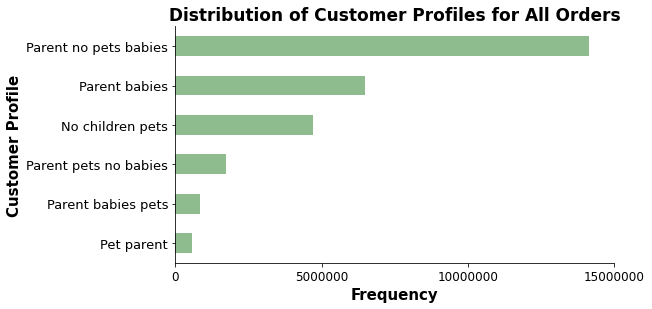

In [67]:
# Create a bar chart of profile distribution for all orders
bar_all_profiles = df_analysis_active['profile'].value_counts().plot.barh(figsize = (8,4), color = ['darkseagreen'])
plt.tight_layout()
bar_all_profiles.get_xaxis().get_major_formatter().set_scientific(False)
bar_all_profiles.spines['top'].set_visible(False)
bar_all_profiles.spines['right'].set_visible(False)

#Set titles and axes
plt.xlabel('Frequency', fontsize = 15, fontweight = 'semibold')
plt.ylabel('Customer Profile', fontsize = 15, fontweight = 'semibold')
plt.title('Distribution of Customer Profiles for All Orders', fontsize = 17, fontweight = 'bold')
plt.xticks([0, 5000000, 10000000, 15000000], fontsize = 12)
plt.yticks(fontsize = 13)
bar_all_profiles.invert_yaxis()
plt.show()

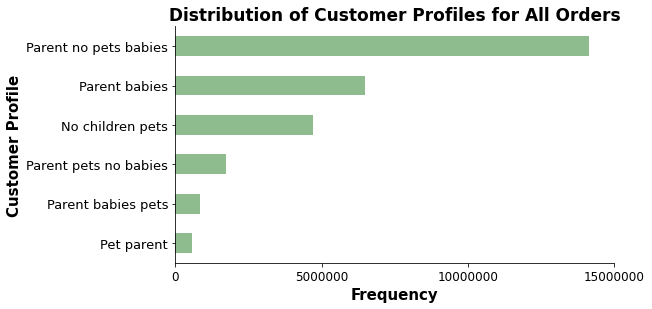

In [68]:
# Exporting the profiles bar chart
bar_all_profiles.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_all_profiles.png'), bbox_inches='tight')
bar_all_profiles.figure

***

## 05. Exporting  the full dataframe 'df_analysis_active' to analysis_active_customers_profiles.csv file

In [69]:
# Export the df_analysis_active dataframe in csv (for the client)
df_analysis_active.to_csv(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'analysis_active_customers_profiles.csv'))

***

*Looking across the whole dataset (Customer profiling for individual customer user_id's is done in Part 3)*